In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot
import numpy as np
plt.rcParams.update({'figure.max_open_warning': 0})

In [2]:
import matplotlib as mpl
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 30}

mpl.rc('font', **font)

In [3]:
df = pd.read_csv('\\Results_CSV\\Results_Transfer_Learning_Sim_to_Physical\\result_tl.csv')

In [6]:
df

,models,r2_qsort_s,ape_qsort_s,r2_qsort_p,ape_qsort_p
0,svr,0.918108,0.163349,-0.030197,0.224167
1,lr,-0.400000,1.200000,-0.600000,1.400000
2,rr,0.845162,0.234457,0.061225,0.237564
3,knn,0.618170,0.232887,-0.342189,0.214369
4,gpr,0.209078,0.700095,0.127807,0.227634
5,dt,0.848682,0.167914,-0.010785,0.230402
6,rf,0.879630,0.158508,0.261504,0.212435
7,etr,0.889580,0.154486,0.039261,0.214084
8,gbr,0.904771,0.141672,0.058790,0.221617
9,xgb,0.836674,0.198839,0.134290,0.236240


In [7]:
ls  = df['models']
ls

0     svr
1      lr
2      rr
3     knn
4     gpr
5      dt
6      rf
7     etr
8     gbr
9     xgb
10    dnn
Name: models, dtype: object

In [8]:
k = df.iloc[0]['r2_qsort_s']
type(k)

numpy.float64

In [9]:
r2_qsort_s = []
ape_qsort_s = []
for i in range(11):
    temp = df.iloc[i]['r2_qsort_s']
    r2_qsort_s.append(temp)
for i in range(11):
    temp = df.iloc[i]['ape_qsort_s']
    ape_qsort_s.append(temp)
for i in range(11):
    ape_qsort_s[i] = ape_qsort_s[i]*100

In [13]:
ape_qsort_s, ls, np.mean(ape_qsort_s[5:10])

([16.334893,
  120.0,
  23.445695,
  23.288742300000003,
  70.009461,
  16.791379,
  15.850754,
  15.448622,
  14.167187,
  19.883855,
  22.4726887],
 0     svr
 1      lr
 2      rr
 3     knn
 4     gpr
 5      dt
 6      rf
 7     etr
 8     gbr
 9     xgb
 10    dnn
 Name: models, dtype: object,
 16.428359399999998)

In [26]:
main_index = [0,5,6,7,8]
s_r2= 0
s_ape = 0
for i in main_index:
    s_r2 = s_r2 + r2_qsort_s[i]
for i in main_index:
    s_ape = s_ape + ape_qsort_s[i]
print(s_r2/5, s_ape/5)    

0.8881539758000001 15.718566999999998


C:\Users\Rajat\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
C:\Users\Rajat\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
C:\Users\Rajat\Anaconda3\lib\site-packages\ipykernel_launcher.py:67: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


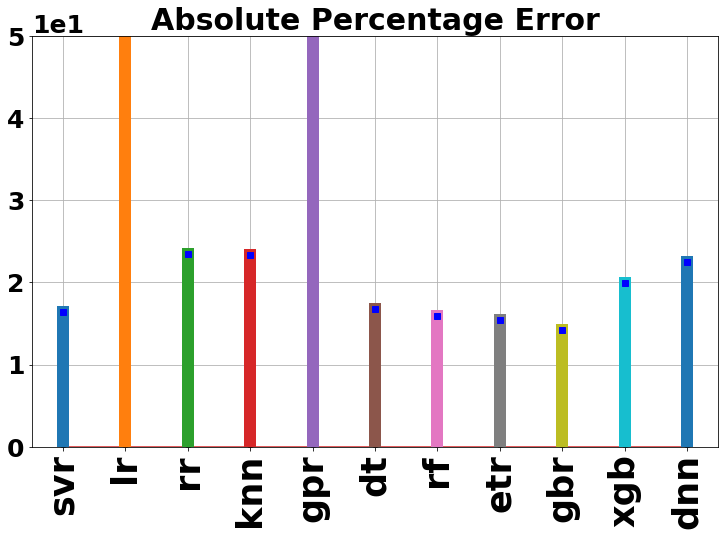

In [66]:
ls = ['svr', 'lr', 'rr', 'knn', 'gpr','dt','rf','etr',
          'gbr', 'xgb','dnn']
fig, ax = plt.subplots(1,1, figsize = (11, 8)) # create 2x2 array of subplots
# color = 'tab:red'
# y_r2 = r2_qsort_s
y_mape = ape_qsort_s
# px = ax.bar(ls,y_r2,color = 'mediumorchid', label = 'R2')
# ax.legend(frameon=True, loc='upper left', prop={'size': 20})

# ax[i,j].bar(ls, y,color = 'blue')
# ax.set_xticklabels(ls, rotation = 90, fontsize = 35, fontweight = 'bold')

# if j == 4:
#    ax[i,j].set_ylabel('MedAPE score')
# ax.set_title(dataset_names[cb[j]] + ' (' + dataset[cb[j]] + ')', fontsize = 25, fontweight = 'bold') 
# ax.set_ylim(-0.5,1.5)

# ax.grid()

ax_temp = ax

# create data
x = ls
values = y_mape

# stem function: first way
ax_temp.stem(x, values)
# plt.ylim(0, 1.2)
#plt.show()

# stem function: If no X provided, a sequence of numbers is created by python:
# plt.stem(values)
#plt.show()

# stem function: second way
(markerline, stemlines, baseline) = ax_temp.stem(x, values, linefmt='-*', markerfmt='bs', basefmt='k-',label='APE score')
plt.setp(baseline, visible = False)
plt.setp(stemlines, 'linewidth', 12)
#plt.show()

    
    
# ax_temp = ax.twinx()  # instantiate a second axes that shares the same x-axis
# line2 = ax_temp.bar(ls,y_mape, color = 'mediumorchid',label='APE score') # add boxplot to 1st subplot
# line, = ax.plot([1, 2, 3], label='Inline label')
# ax_temp.legend(frameon= True, loc='upper right', prop={'size': 20})
plt.title('Absolute Percentage Error', fontsize = 30, fontweight = 'bold')
# ax_temp.boxplot(y_mape,labels = ls)
# ax[i,j].bar(ls, y,color = 'blue')
ax_temp.set_xticklabels(ls, rotation = 90, fontsize = 35, fontweight = 'bold')
# ax_temp.set_yticklabels(fontsize = 15)
ax_temp.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
# ax_temp.legend(['MedAPE score'])

fig.tight_layout()  # otherwise the right y-label is slightly clipped
ax_temp.set_ylim(0,50)

# plt.show()
# extent = ax.get_tightbbox(fig.canvas.get_renderer()).transformed(fig.dpi_scale_trans.inverted())
# fig.savefig('cb_1.pdf', bbox_inches = extent)
ax_temp.grid()
name = 'transfer_learning_qsort_simulated'
plt.rc('font', size=25)
fig.savefig(name+ '.eps')


fig.show()


In [16]:
r2_qsort_p = []
ape_qsort_p = []
for i in range(11):
    temp = df.iloc[i]['r2_qsort_p']
    r2_qsort_p.append(temp)
for i in range(11):
    temp = df.iloc[i]['ape_qsort_p']
    ape_qsort_p.append(temp)
for i in range(11):
    ape_qsort_p[i] = ape_qsort_p[i]*100

In [19]:
ls, ape_qsort_p, np.mean(ape_qsort_p[5:10])

(0     svr
 1      lr
 2      rr
 3     knn
 4     gpr
 5      dt
 6      rf
 7     etr
 8     gbr
 9     xgb
 10    dnn
 Name: models, dtype: object,
 [22.4167473,
  140.0,
  23.756366,
  21.436934,
  22.763375999999997,
  23.040182,
  21.243521,
  21.408400000000004,
  22.161718999999998,
  23.624029,
  22.1345352],
 22.295570200000004)

C:\Users\Rajat\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
C:\Users\Rajat\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
C:\Users\Rajat\Anaconda3\lib\site-packages\ipykernel_launcher.py:67: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


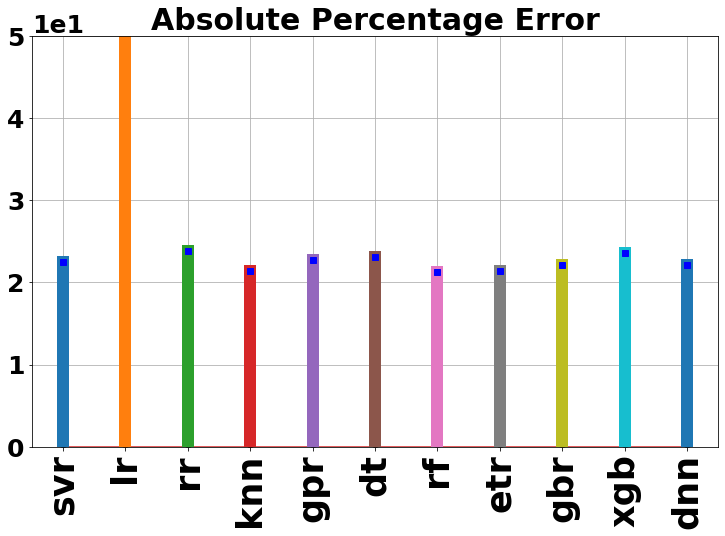

In [67]:
ls = ['svr', 'lr', 'rr', 'knn', 'gpr','dt','rf','etr',
          'gbr', 'xgb','dnn']
fig, ax = plt.subplots(1,1, figsize = (11, 8)) # create 2x2 array of subplots
# color = 'tab:red'
# y_r2 = r2_qsort_s
y_mape = ape_qsort_p
# px = ax.bar(ls,y_r2,color = 'mediumorchid', label = 'R2')
# ax.legend(frameon=True, loc='upper left', prop={'size': 20})

# ax[i,j].bar(ls, y,color = 'blue')
# ax.set_xticklabels(ls, rotation = 90, fontsize = 35, fontweight = 'bold')

# if j == 4:
#    ax[i,j].set_ylabel('MedAPE score')
# ax.set_title(dataset_names[cb[j]] + ' (' + dataset[cb[j]] + ')', fontsize = 25, fontweight = 'bold') 
# ax.set_ylim(-0.5,1.5)

# ax.grid()

ax_temp = ax

# create data
x = ls
values = y_mape

# stem function: first way
ax_temp.stem(x, values)
# plt.ylim(0, 1.2)
#plt.show()

# stem function: If no X provided, a sequence of numbers is created by python:
# plt.stem(values)
#plt.show()

# stem function: second way
(markerline, stemlines, baseline) = ax_temp.stem(x, values, linefmt='-*', markerfmt='bs', basefmt='k-',label='APE score')
plt.setp(baseline, visible = False)
plt.setp(stemlines, 'linewidth', 12)
#plt.show()

    
    
# ax_temp = ax.twinx()  # instantiate a second axes that shares the same x-axis
# line2 = ax_temp.bar(ls,y_mape, color = 'mediumorchid',label='APE score') # add boxplot to 1st subplot
# line, = ax.plot([1, 2, 3], label='Inline label')
# ax_temp.legend(frameon= True, loc='upper right', prop={'size': 20})
plt.title('Absolute Percentage Error', fontsize = 30, fontweight = 'bold')
# ax_temp.boxplot(y_mape,labels = ls)
# ax[i,j].bar(ls, y,color = 'blue')
ax_temp.set_xticklabels(ls, rotation = 90, fontsize = 35, fontweight = 'bold')
# ax_temp.set_yticklabels(fontsize = 15)
ax_temp.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
# ax_temp.legend(['MedAPE score'])

fig.tight_layout()  # otherwise the right y-label is slightly clipped
ax_temp.set_ylim(0,50)

# plt.show()
# extent = ax.get_tightbbox(fig.canvas.get_renderer()).transformed(fig.dpi_scale_trans.inverted())
# fig.savefig('cb_1.pdf', bbox_inches = extent)
ax_temp.grid()
name = 'transfer_learning_qsort_physical'
plt.rc('font', size=25)
fig.savefig(name+ '.eps')


fig.show()
